# Problem 1: Linear Regression
### You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

### Data Dictionary
1. <b>Carat:</b> Carat weight of the cubic zirconia.  
2. <b>Cut:</b> Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.  
3. <b>Color:</b> Colour of the cubic zirconia.With D being the best and J the worst.  
4. <b>Clarity:</b> Cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL =flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3  
5. <b>Depth:</b> The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.  
6. <b>Table:</b> The Width of the cubic zirconias Table expressed as a Percentage of its Average Diameter.  
7. <b>Price:</b> The Price of the cubic zirconia.
8. <b>X:</b> Length of the cubic zirconia in mm.  
9. <b>Y:</b> Width of the cubic zirconia in mm.  
10. <b>Z:</b> Height of the cubic zirconia in mm.  

In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
import matplotlib.style
from sklearn import metrics,model_selection

#### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.
#### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [2]:
df=pd.read_csv('cubic_zirconia.csv')
df.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
21723,21724,1.02,Premium,D,SI1,62.3,59.0,6.38,6.42,3.99,5890
18630,18631,0.34,Premium,G,VS2,62.0,59.0,4.43,4.47,2.76,596
2639,2640,0.78,Ideal,I,VS1,61.9,56.0,5.91,5.94,3.67,3105
8991,8992,0.70,Very Good,G,VVS2,60.0,60.0,5.78,5.85,3.49,3235
10917,10918,0.72,Ideal,F,SI1,61.5,58.0,5.72,5.76,3.53,2642


In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [6]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [7]:
df[['carat' ,'depth', 'table', 'x', 'y', 'z','price']].nunique()

carat     257
depth     169
table     112
x         531
y         526
z         356
price    8742
dtype: int64

C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages

Text(0.5, 1.0, 'price Distribution')

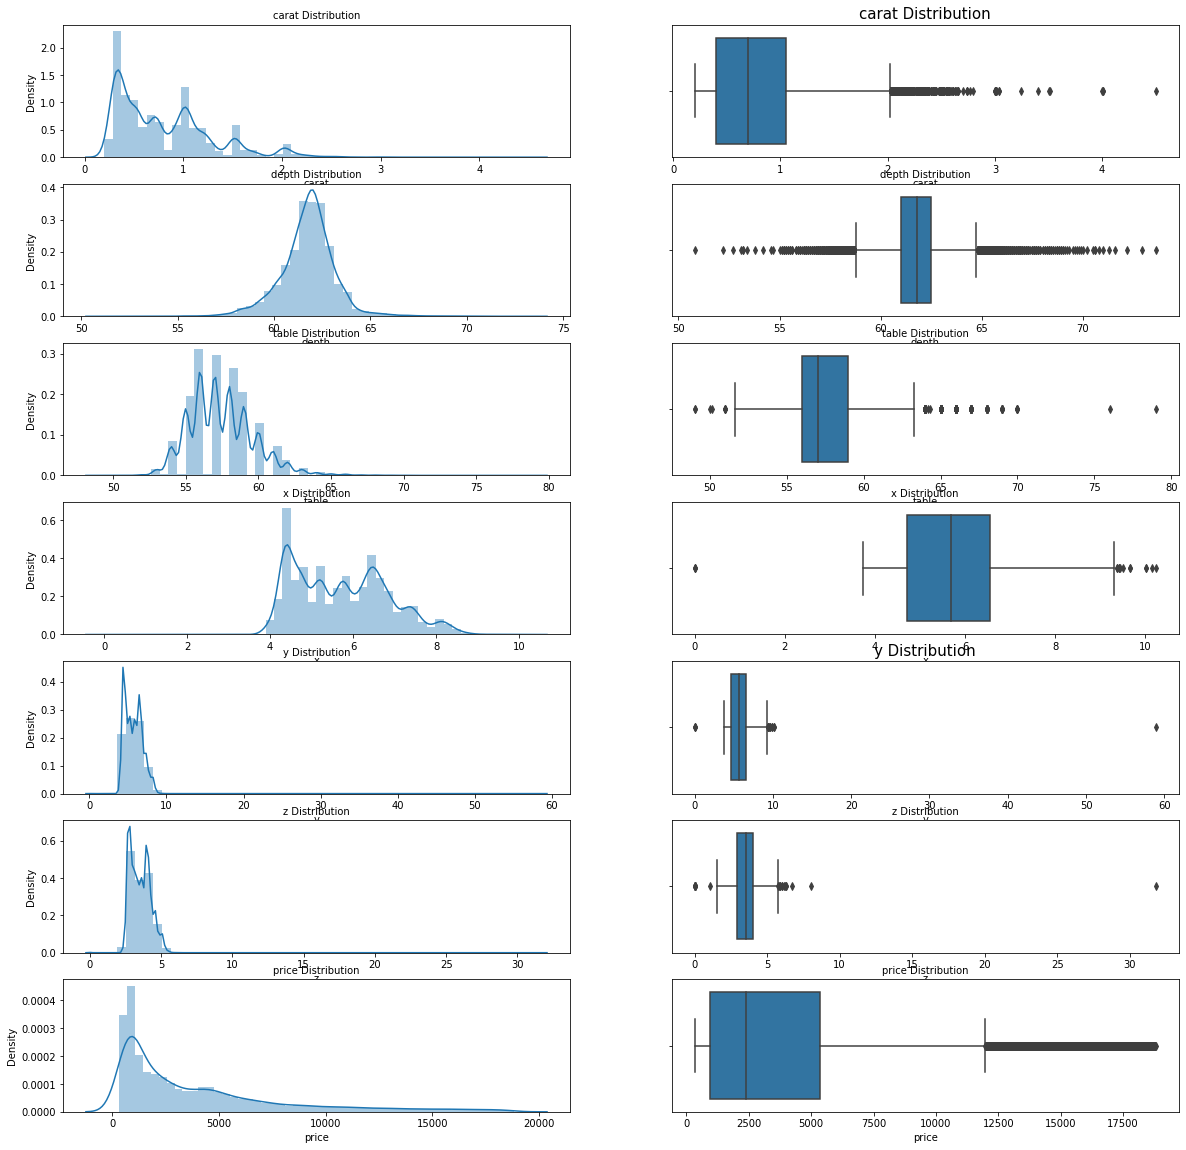

In [8]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(20, 20)
a = sns.distplot(df['carat'] , ax=axes[0][0])
a.set_title("carat Distribution",fontsize=10)
a = sns.boxplot(df['carat'] , orient = "v" , ax=axes[0][1])
a.set_title("carat Distribution",fontsize=15)

a = sns.distplot(df['depth'] , ax=axes[1][0])
a.set_title("depth Distribution",fontsize=10)

a = sns.boxplot(df['depth'] , orient = "v" , ax=axes[1][1])
a.set_title("depth Distribution",fontsize=10)

a = sns.distplot(df['table'] , ax=axes[2][0])
a.set_title("table Distribution",fontsize=10)

a = sns.boxplot(df['table'] , orient = "v" , ax=axes[2][1])
a.set_title("table Distribution",fontsize=10)

a = sns.distplot(df['x'] , ax=axes[3][0])
a.set_title("x Distribution",fontsize=10)

a = sns.boxplot(df['x'] , orient = "v" , ax=axes[3][1])
a.set_title("x Distribution",fontsize=10)

a = sns.distplot(df['y'] , ax=axes[4][0])
a.set_title("y Distribution",fontsize=10)

a = sns.boxplot(df['y'] , orient = "v" , ax=axes[4][1])
a.set_title("y Distribution",fontsize=15)

a = sns.distplot(df['z'] , ax=axes[5][0])
a.set_title("z Distribution",fontsize=10)

a = sns.boxplot(df['z'] , orient = "v" , ax=axes[5][1])
a.set_title("z Distribution",fontsize=10)

a = sns.distplot(df['price'] , ax=axes[6][0])
a.set_title("price Distribution",fontsize=10)

a = sns.boxplot(df['price'] , orient = "v" , ax=axes[6][1])
a.set_title("price Distribution",fontsize=10)

<AxesSubplot:xlabel='cut', ylabel='price'>

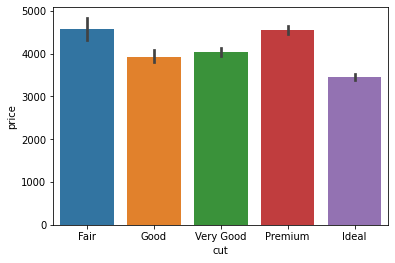

In [9]:
sns.barplot(data = df, x='cut',y='price',order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

<AxesSubplot:xlabel='color', ylabel='price'>

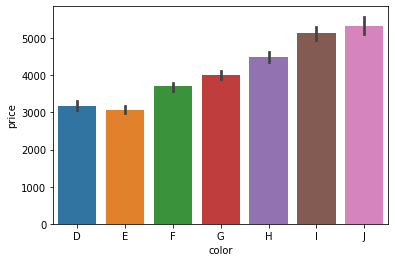

In [10]:
sns.barplot(data = df, x='color',y='price',order = ['D', 'E', 'F', 'G','H', 'I', 'J'] )

In [11]:
df.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [12]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [13]:
print('Total size of dataset:-',df.shape)
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df.drop_duplicates(inplace=True) 
print('After dropping duplicates:-',df.shape)

Total size of dataset:- (26967, 10)
Number of duplicate rows = 34
After dropping duplicates:- (26933, 10)


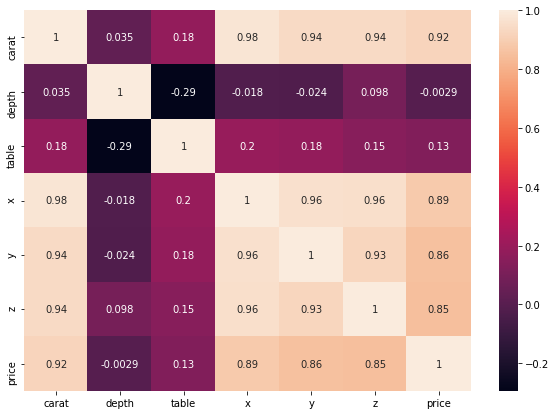

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

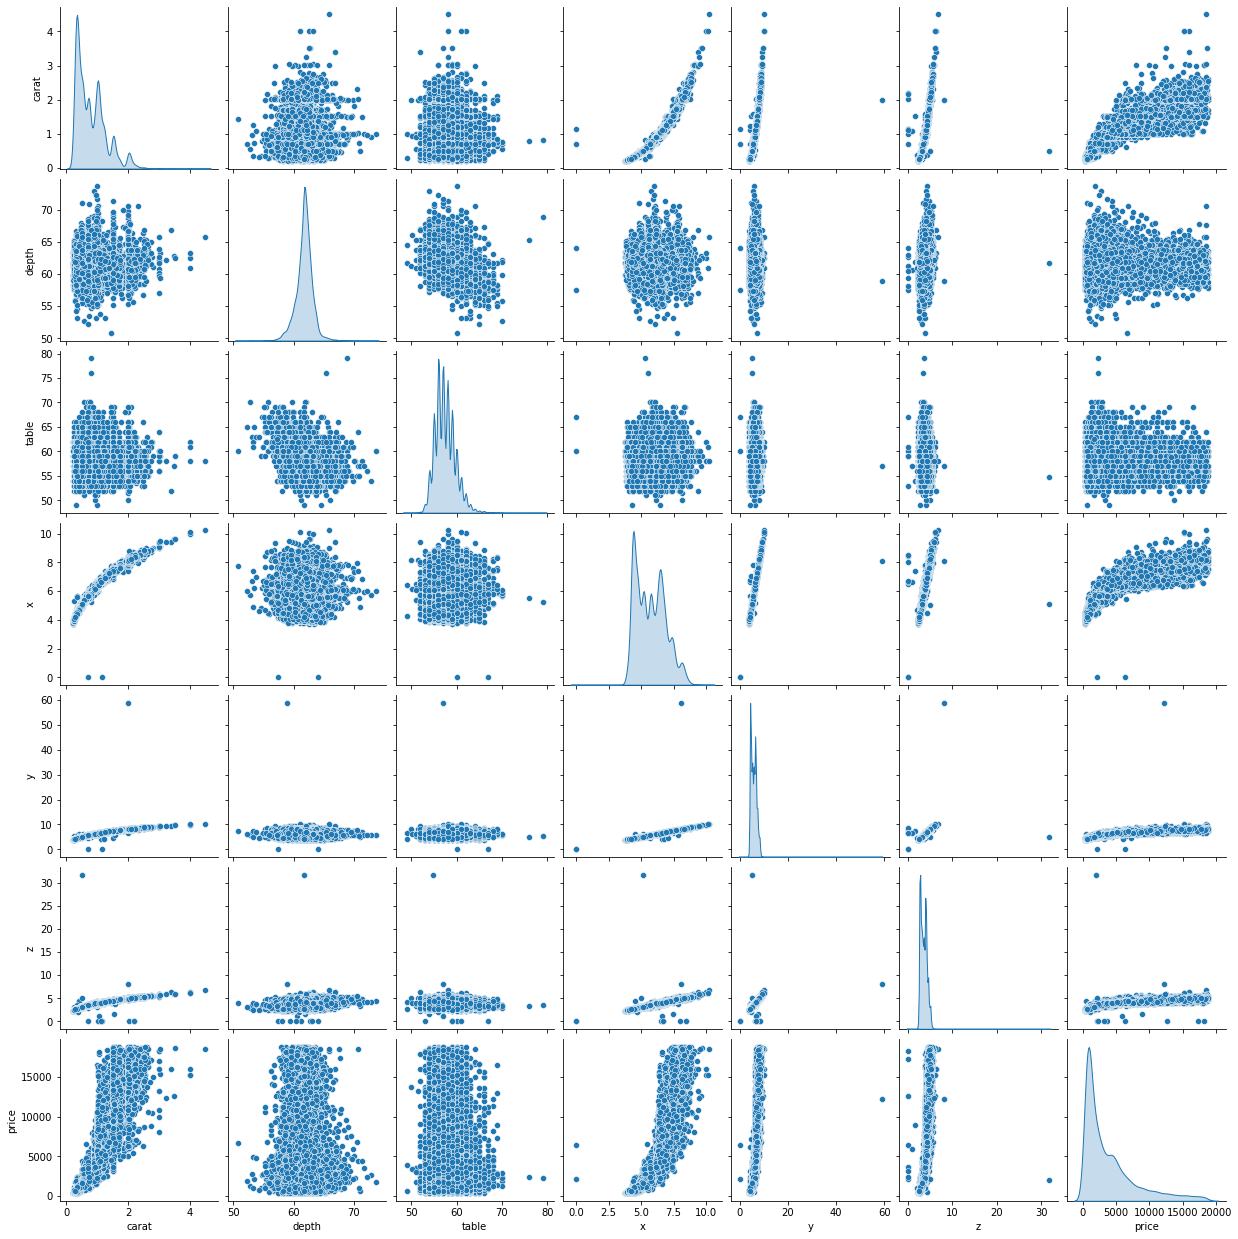

In [15]:
convar=df.dtypes[(df.dtypes!='uint8')].index
df_convar = (df[convar])
sns.pairplot(df_convar, diag_kind='kde')  
plt.show()

C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


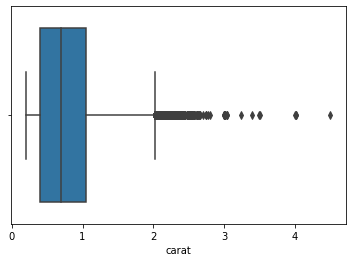

C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


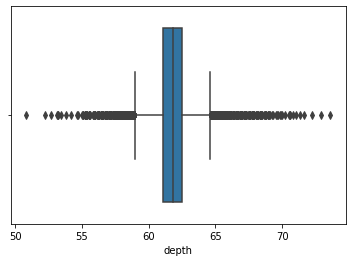

C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


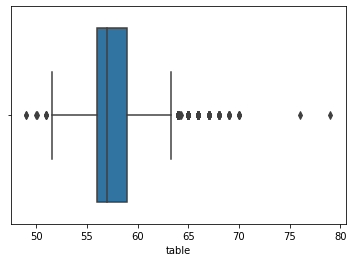

C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


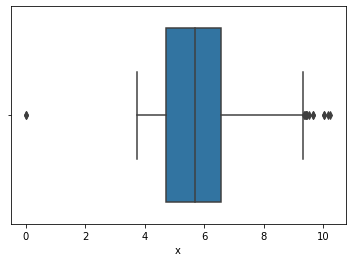

C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


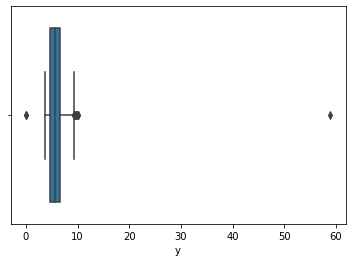

C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


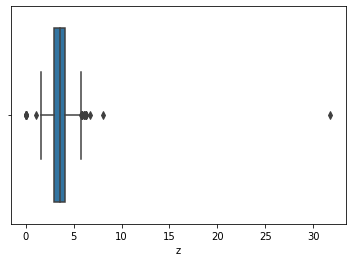

C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


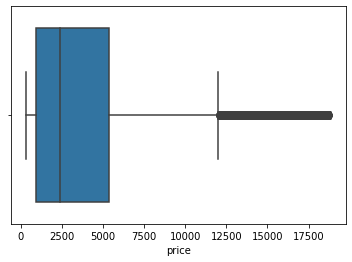

In [16]:
cols = ['carat' ,'depth', 'table', 'x', 'y', 'z','price']
for i in cols:
    sns.boxplot(df[i])
    plt.show()

C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


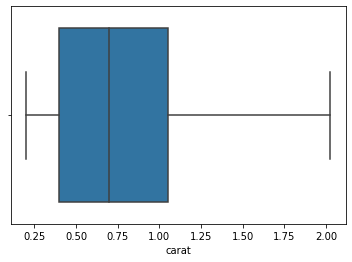

C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


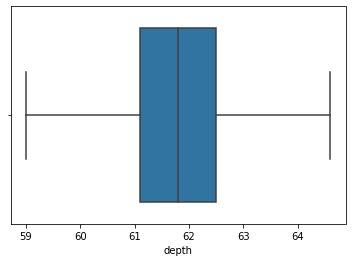

C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


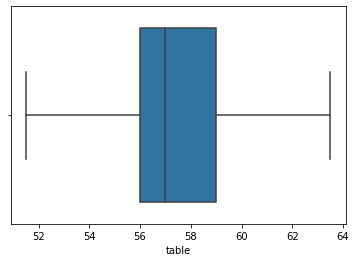

C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


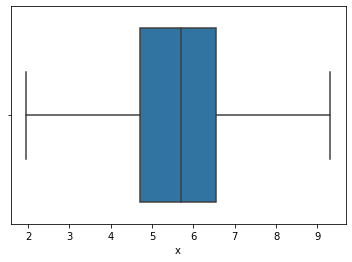

C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


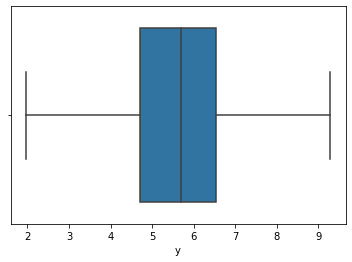

C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


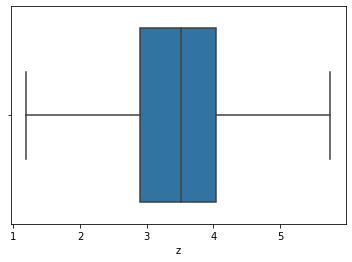

C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


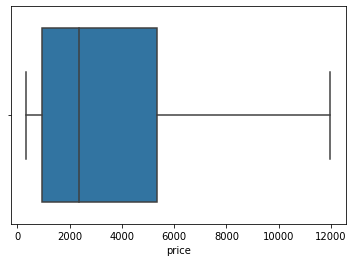

In [17]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr,ur

cols = ['carat' ,'depth', 'table', 'x', 'y', 'z','price']
for i in df[cols]:
    lr,ur=remove_outlier(df[i])
    df[i]=np.where(df[i]>ur,ur,df[i])
    df[i]=np.where(df[i]<lr,lr,df[i])
    
for i in cols:
    sns.boxplot(df[i])
    plt.show()    

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num= df.select_dtypes(exclude=['object'])
df[num.columns] = sc.fit_transform(num)

In [19]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.067471,Ideal,E,SI1,0.288029,0.261676,-1.295847,-1.288982,-1.258616,-0.933304
1,-1.002552,Premium,G,IF,-0.778874,0.261676,-1.162650,-1.136943,-1.201206,-0.793460
2,0.230898,Very Good,E,VVS2,0.370098,1.188856,0.275874,0.347673,0.348871,0.736177
3,-0.807797,Ideal,F,VS1,-0.122318,-0.665503,-0.807459,-0.832865,-0.828039,-0.765203
4,-1.045831,Ideal,F,VVS1,-1.107151,0.725266,-1.224808,-1.163774,-1.272969,-0.852569


In [20]:
df = pd.get_dummies(df, columns=['cut','color','clarity'],drop_first=True)
df.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.067471,0.288029,0.261676,-1.295847,-1.288982,-1.258616,-0.933304,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,-1.002552,-0.778874,0.261676,-1.162650,-1.136943,-1.201206,-0.793460,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.230898,0.370098,1.188856,0.275874,0.347673,0.348871,0.736177,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.807797,-0.122318,-0.665503,-0.807459,-0.832865,-0.828039,-0.765203,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.045831,-1.107151,0.725266,-1.224808,-1.163774,-1.272969,-0.852569,0,1,0,...,0,0,0,0,0,0,0,0,1,0


#### 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

In [21]:
X=df.drop('price',axis=1)
Y=df[['price']]

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3 , random_state=1)

rm = LinearRegression()
rm.fit(Xtrain, Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
#Coefficients
for i, col in enumerate(Xtrain.columns):
    print("The coefficient for",col,"is",rm.coef_[0][i])

The coefficient for carat is 1.2161329514335473
The coefficient for depth is -0.0052750863342279665
The coefficient for table is -0.011559776428511599
The coefficient for x is -0.3864993792386063
The coefficient for y is 0.2699649732437064
The coefficient for z is -0.03287447999923958
The coefficient for cut_Good is 0.13892540989673002
The coefficient for cut_Ideal is 0.20606016901323426
The coefficient for cut_Premium is 0.19456283920486575
The coefficient for cut_Very Good is 0.17499180039681986
The coefficient for color_E is -0.05245162297305861
The coefficient for color_F is -0.07404902518682938
The coefficient for color_G is -0.12380721166937225
The coefficient for color_H is -0.24681524297689542
The coefficient for color_I is -0.3817400670460194
The coefficient for color_J is -0.5559320154751427
The coefficient for clarity_IF is 1.1545113919274463
The coefficient for clarity_SI1 is 0.7265911942119935
The coefficient for clarity_SI2 is 0.48569529107635834
The coefficient for clari

In [23]:
#Intercept
intercept = rm.intercept_[0]
print("The intercept for our model is",intercept)

The intercept for our model is -0.8463712168097295


In [24]:
#R-Square
print('The accuracy prediction in train set :-',rm.score(Xtrain, Ytrain))
print('The accuracy prediction in test set :-',rm.score(Xtest, Ytest))

The accuracy prediction in train set :- 0.940204556569622
The accuracy prediction in test set :- 0.9419074462493612


In [25]:
#MSE
pred_train=rm.fit(Xtrain, Ytrain).predict(Xtrain)
print('MSE on Train Data :-',metrics.mean_squared_error(Ytrain,pred_train))
pred_test=rm.fit(Xtrain, Ytrain).predict(Xtest)
print('MSE on Train Data :-',metrics.mean_squared_error(Ytest,pred_test))

MSE on Train Data :- 0.05970897569412636
MSE on Train Data :- 0.058288553028841346


In [26]:
#RMSE
pred_train=rm.fit(Xtrain, Ytrain).predict(Xtrain)
print('RMSE on Train Data :-',np.sqrt(metrics.mean_squared_error(Ytrain,pred_train)))
pred_test=rm.fit(Xtrain, Ytrain).predict(Xtest)
print('RMSE on Train Data :-',np.sqrt(metrics.mean_squared_error(Ytest,pred_test)))

RMSE on Train Data :- 0.24435420130238472
RMSE on Train Data :- 0.24143022393404134


In [27]:
#Method 2 using StatsModel
data_train = pd.concat([Xtrain, Ytrain], axis=1)
data_test=pd.concat([Xtest,Ytest],axis=1)

data_train.rename(columns ={"cut_Very Good":"cut_Very_Good"},inplace=True)
data_test.rename(columns ={"cut_Very Good":"cut_Very_Good"},inplace=True)

expr= 'price ~carat+depth+table+x+y+z+cut_Good+cut_Ideal+cut_Premium+cut_Very_Good+color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2'
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.287e+04
Date:                Sat, 20 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:35:12   Log-Likelihood:                -184.80
No. Observations:               18853   AIC:                             417.6
Df Residuals:                   18829   BIC:                             605.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.8464      0.019    -44.474

In [28]:
#Linear Model Equation
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.85) * Intercept + (1.22) * carat + (-0.01) * depth + (-0.01) * table + (-0.39) * x + (0.27) * y + (-0.03) * z + (0.14) * cut_Good + (0.21) * cut_Ideal + (0.19) * cut_Premium + (0.17) * cut_Very_Good + (-0.05) * color_E + (-0.07) * color_F + (-0.12) * color_G + (-0.25) * color_H + (-0.38) * color_I + (-0.56) * color_J + (1.15) * clarity_IF + (0.73) * clarity_SI1 + (0.49) * clarity_SI2 + (0.96) * clarity_VS1 + (0.88) * clarity_VS2 + (1.09) * clarity_VVS1 + (1.08) * clarity_VVS2 + 

# Problem 2: Logistic Regression and LDA
### You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

### Data Dictionary 
1. <b>Holiday_Package :</b> Opted for Holiday Package yes/no?  
2. <b>Salary:</b> Employee salary
3. <b>age:</b> Age in years  
4. <b>edu:</b> Years of formal education  
5. <b>no_young_children:</b> The number of young children (younger than 7 years)
6. <b>no_older_children:</b> Number of older children  
7. <b>foreign:</b> foreigner- Yes/No

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

#### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [30]:
data=pd.read_csv('Holiday_Package.csv')
data.sample(5)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
333,334,no,20000,24,8,1,0,no
126,127,no,34424,24,6,1,0,no
870,871,yes,55958,41,10,0,1,yes
698,699,yes,32584,22,9,2,0,yes
700,701,yes,39097,26,4,0,0,yes


In [31]:
data = data.drop('Unnamed: 0', axis=1)
data.shape

(872, 7)

In [32]:
data.rename(columns ={"Holliday_Package":"Holiday_Package"},inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holiday_Package    872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [33]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


In [34]:
data.isna().sum()

Holiday_Package      0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [35]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [36]:
for i in data.columns: 
    if data[i].dtype == 'object': 
        print(i)
        print(data[i].value_counts())
        print('\n')

Holiday_Package
no     471
yes    401
Name: Holiday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




In [37]:
data.Holiday_Package.value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holiday_Package, dtype: float64

C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or

Text(0.5, 1.0, 'no_older_children Distribution')

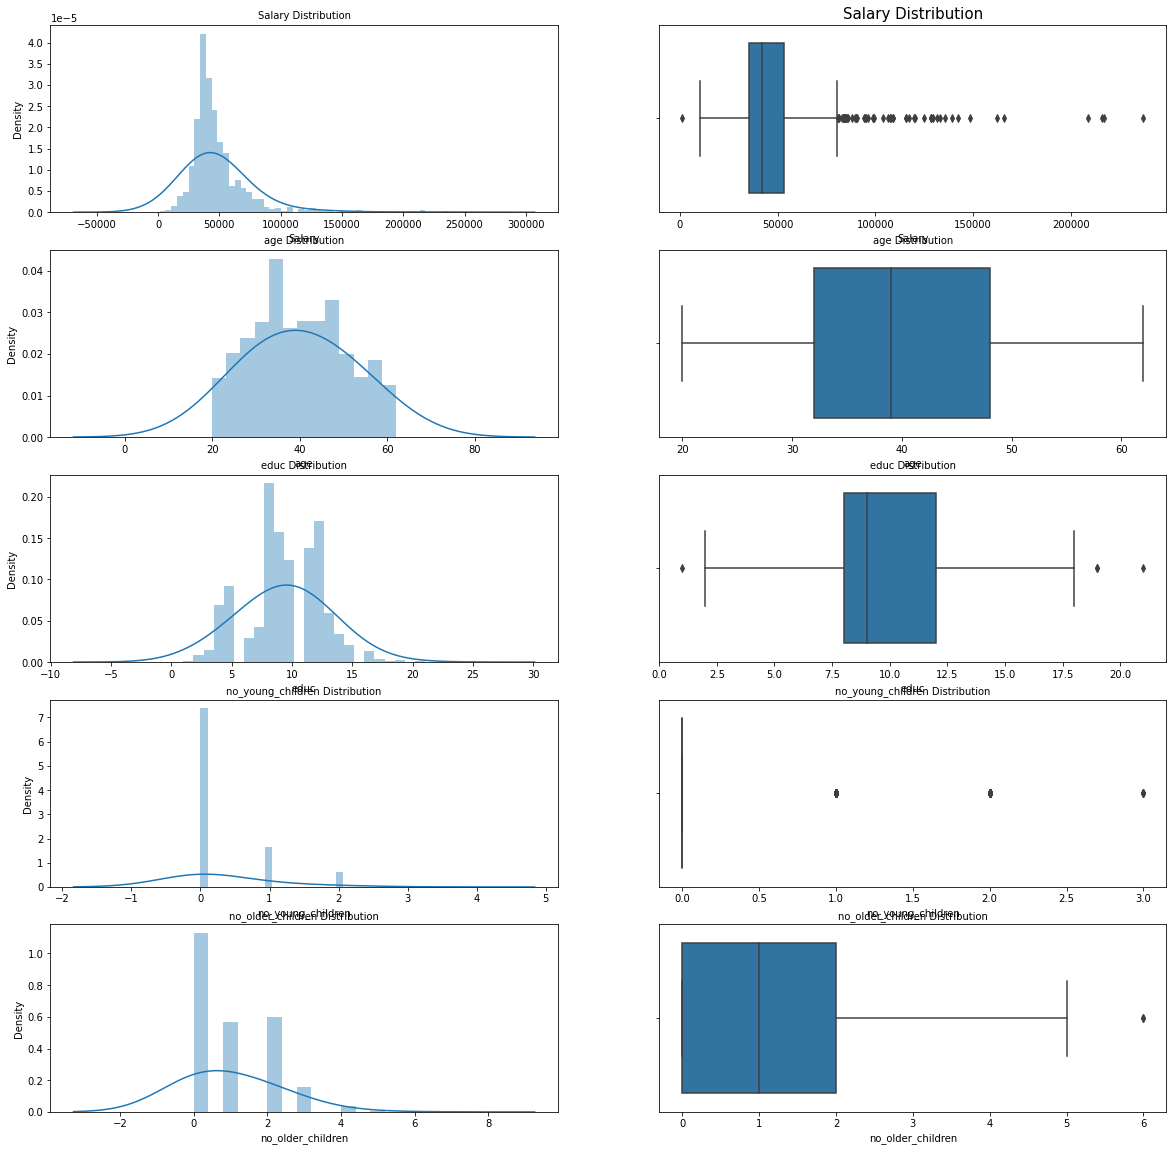

In [38]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(20, 20)

a = sns.distplot(data['Salary'], kde_kws = {'bw' : 1}, ax=axes[0][0])
a.set_title("Salary Distribution",fontsize=10)

a = sns.boxplot(data['Salary'] , orient = "v" , ax=axes[0][1])
a.set_title("Salary Distribution",fontsize=15)

a = sns.distplot(data['age'], kde_kws = {'bw' : 1}, ax=axes[1][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(data['age'] , orient = "v" , ax=axes[1][1])
a.set_title("age Distribution",fontsize=10)

a = sns.distplot(data['educ'],  kde_kws = {'bw' : 1}, ax=axes[2][0])
a.set_title("educ Distribution",fontsize=10)

a = sns.boxplot(data['educ'] , orient = "v" , ax=axes[2][1])
a.set_title("educ Distribution",fontsize=10)

a = sns.distplot(data['no_young_children'],  kde_kws = {'bw' : 1}, ax=axes[3][0])
a.set_title("no_young_children Distribution",fontsize=10)

a = sns.boxplot(data['no_young_children'] , orient = "v" , ax=axes[3][1])
a.set_title("no_young_children Distribution",fontsize=10)

a = sns.distplot(data['no_older_children'], kde_kws = {'bw' : 1}, ax=axes[4][0])
a.set_title("no_older_children Distribution",fontsize=10)

a = sns.boxplot(data['no_older_children'] , orient = "v" , ax=axes[4][1])
a.set_title("no_older_children Distribution",fontsize=10)


C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:1296: UserWarning: 30.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:1296: UserWarning: 36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


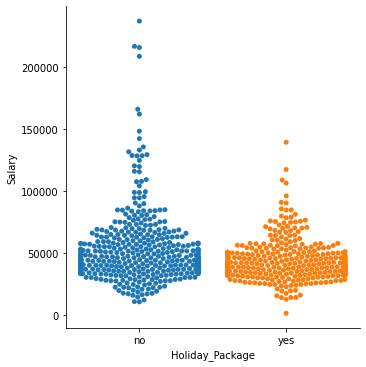

In [39]:
sns.catplot(x="Holiday_Package", y="Salary",kind="swarm",data=data)

<AxesSubplot:xlabel='foreign', ylabel='count'>

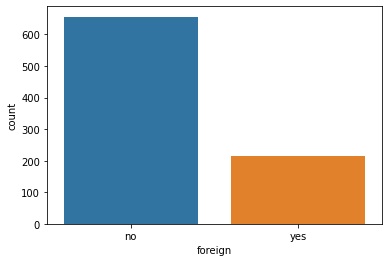

In [40]:
sns.countplot(x="foreign", data=data)

<AxesSubplot:xlabel='age', ylabel='Salary'>

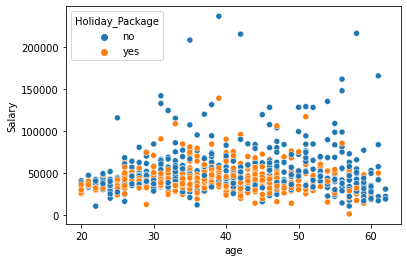

In [41]:
sns.scatterplot(data = data, x='age',y='Salary', hue = 'Holiday_Package')

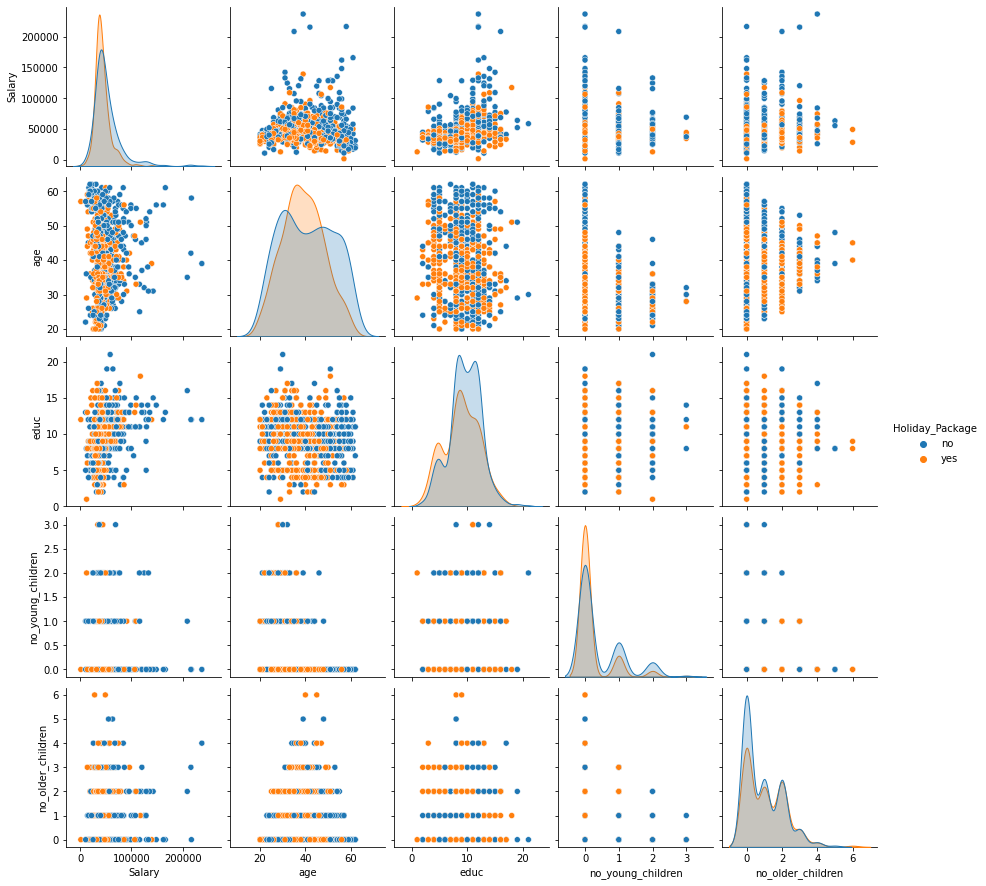

In [42]:
sns.pairplot(data ,diag_kind='kde' ,hue='Holiday_Package')

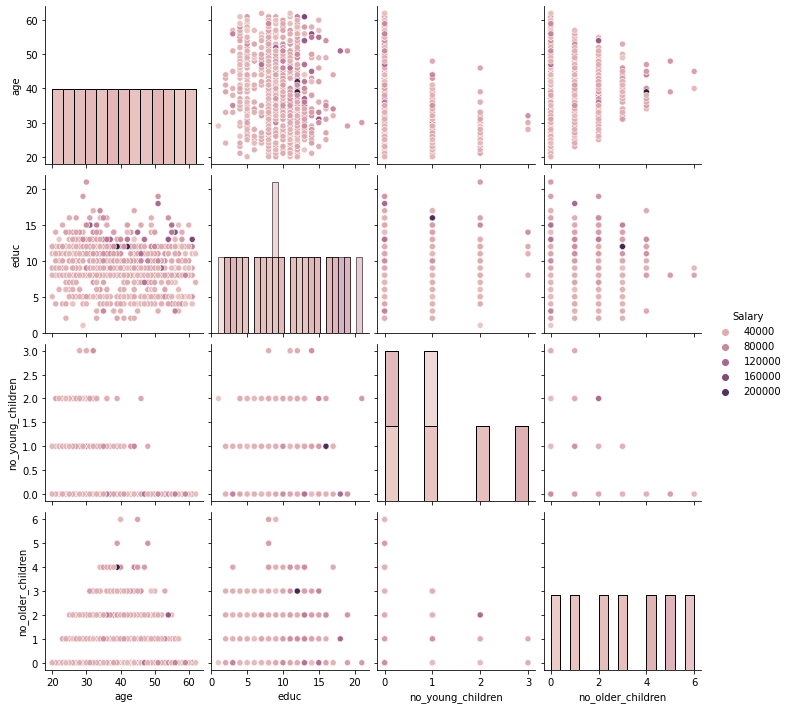

In [43]:
sns.pairplot(data ,diag_kind='hist' ,hue='Salary')

C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


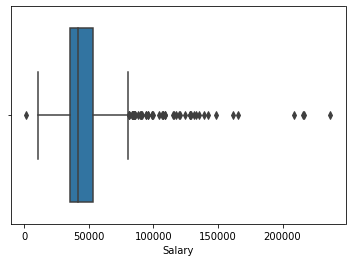

C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


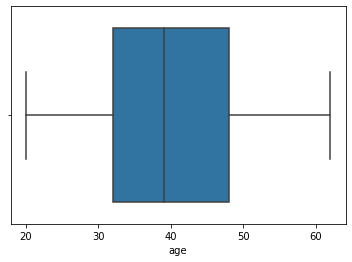

C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


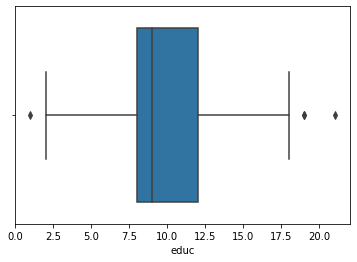

C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


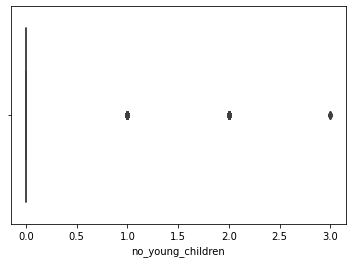

C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


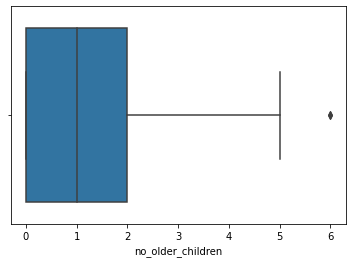

In [44]:
cols= ['Salary','age','educ','no_young_children','no_older_children']
for i in cols:
    sns.boxplot(data[i])
    plt.show();

C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


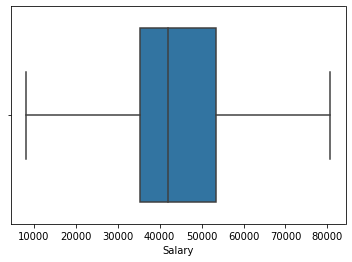

C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


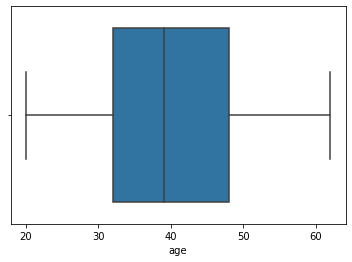

C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


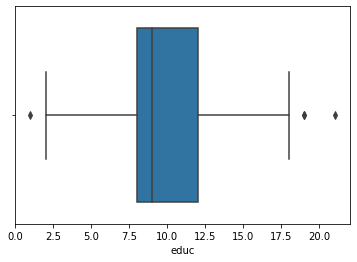

C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


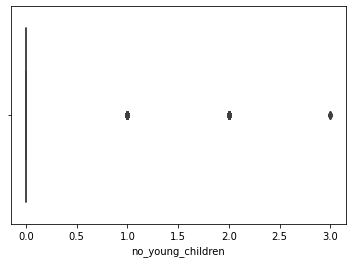

C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


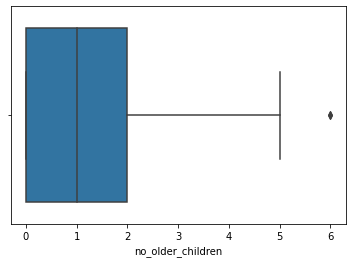

In [45]:
a=['Salary','age']
for i in data[a].columns:
    lr,ur=remove_outlier(data[i])
    data[i]=np.where(data[i]>ur,ur,data[i])
    data[i]=np.where(data[i]<lr,lr,data[i])
for i in cols:
    sns.boxplot(data[i])
    plt.show();       

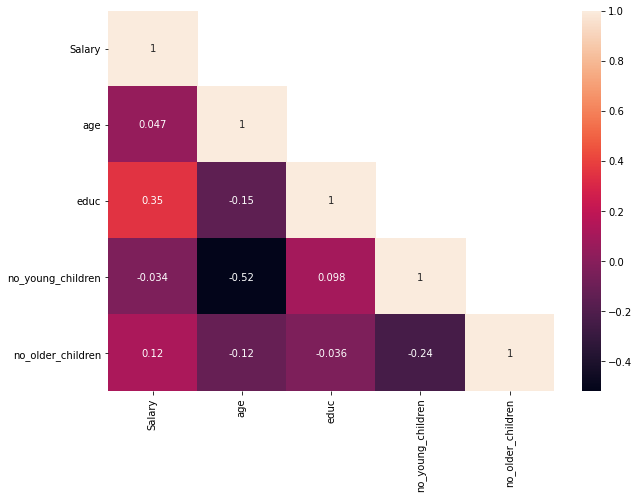

In [46]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True,mask=np.triu(data.corr(),+1));

#### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).
#### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [47]:
for i in data.columns: 
    if data[i].dtype == 'object': 
        print('\n')
        print('variable:',i)
        print(pd.Categorical(data[i].unique()))
        print(pd.Categorical(data[i].unique()).codes)
        data[i] = pd.Categorical(data[i]).codes



variable: Holiday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


variable: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


In [48]:
X = data.drop('Holiday_Package', axis=1)
Y = data['Holiday_Package']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.30 , random_state=1,stratify=Y)

In [49]:
print('TrainSet Target variable proportion:-\n',Ytrain.value_counts(1))
print('\nTestSet Target variable proportion:-\n',Ytest.value_counts(1))

TrainSet Target variable proportion:-
 0    0.539344
1    0.460656
Name: Holiday_Package, dtype: float64

TestSet Target variable proportion:-
 0    0.541985
1    0.458015
Name: Holiday_Package, dtype: float64


In [50]:
print('Number of rows and columns of the training set for the independent variables:',Xtrain.shape)
print('Number of rows and columns of the training set for the dependent variable:',Ytrain.shape)
print('Number of rows and columns of the test set for the independent variables:',Xtest.shape)
print('Number of rows and columns of the test set for the dependent variable:',Ytest.shape)

Number of rows and columns of the training set for the independent variables: (610, 6)
Number of rows and columns of the training set for the dependent variable: (610,)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262,)


### Logistic Regression

In [51]:
#Method 1- Default Parameters
model = LogisticRegression()
model.fit(Xtrain, Ytrain)

ytrain_pred = model.predict(Xtrain)
ytest_pred = model.predict(Xtest)

print('Train Set Accuracy:-',model.score(Xtrain, Ytrain))
print('Test Set Accuracy:-',model.score(Xtest, Ytest))
print('\nConfusion Matrix for Train Set:-\n',confusion_matrix(Ytrain, ytrain_pred))
print('\nClassification Report for Train Set:-\n',classification_report(Ytrain, ytrain_pred))
print('\nConfusion Matrix for Test Set:-\n',confusion_matrix(Ytest, ytest_pred))
print('\nClassification Report for Test Set:-\n',classification_report(Ytest, ytest_pred))

Train Set Accuracy:- 0.5393442622950819
Test Set Accuracy:- 0.5419847328244275

Confusion Matrix for Train Set:-
 [[329   0]
 [281   0]]

Classification Report for Train Set:-
               precision    recall  f1-score   support

           0       0.54      1.00      0.70       329
           1       0.00      0.00      0.00       281

    accuracy                           0.54       610
   macro avg       0.27      0.50      0.35       610
weighted avg       0.29      0.54      0.38       610


Confusion Matrix for Test Set:-
 [[142   0]
 [120   0]]

Classification Report for Test Set:-
               precision    recall  f1-score   support

           0       0.54      1.00      0.70       142
           1       0.00      0.00      0.00       120

    accuracy                           0.54       262
   macro avg       0.27      0.50      0.35       262
weighted avg       0.29      0.54      0.38       262



C:\Users\aaditya.d\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
#Method 2- Grid Search
grid={'penalty':['l2','none'],
      'solver':['liblinear','lbfgs','saga'],
      'tol':[0.0001,0.00001]}

model = LogisticRegression(max_iter=1000,n_jobs=2)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,scoring='f1')
grid_search.fit(Xtrain, Ytrain)

C:\Users\aaditya.d\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\aaditya.d\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\aaditya.d\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\aaditya.d\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\aaditya.d\Anaconda3

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=2, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['liblinear', 'lbfgs', 'saga'],
                         'tol': [0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [53]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-05} 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=2, penalty='l2',
                   random_state=None, solver='liblinear', tol=1e-05, verbose=0,
                   warm_start=False)


In [54]:
bestmodel = grid_search.best_estimator_
ytrain_predict = bestmodel.predict(Xtrain)
ytest_predict = bestmodel.predict(Xtest)

In [55]:
#Accuracy
print('Train Set Accuracy:',bestmodel.score(Xtrain, Ytrain))
print('Test Set Accuracy:',bestmodel.score(Xtest, Ytest))

Train Set Accuracy: 0.659016393442623
Test Set Accuracy: 0.6641221374045801


Confusion Matrix:-
 [[250  79]
 [129 152]]

Classification Report:-
               precision    recall  f1-score   support

           0       0.66      0.76      0.71       329
           1       0.66      0.54      0.59       281

    accuracy                           0.66       610
   macro avg       0.66      0.65      0.65       610
weighted avg       0.66      0.66      0.65       610



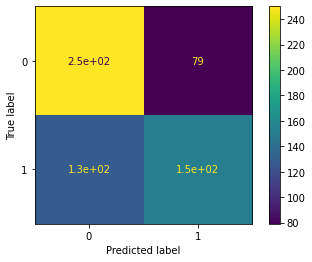

In [56]:
#Confusion Matrix and Classification Report for Train Data
print('Confusion Matrix:-\n',confusion_matrix(Ytrain, ytrain_predict))
plot_confusion_matrix(bestmodel,Xtrain,Ytrain);
print('\nClassification Report:-\n',classification_report(Ytrain, ytrain_predict))

Confusion Matrix:-
 [[112  30]
 [ 58  62]]

Classification Report:-
               precision    recall  f1-score   support

           0       0.66      0.79      0.72       142
           1       0.67      0.52      0.58       120

    accuracy                           0.66       262
   macro avg       0.67      0.65      0.65       262
weighted avg       0.67      0.66      0.66       262



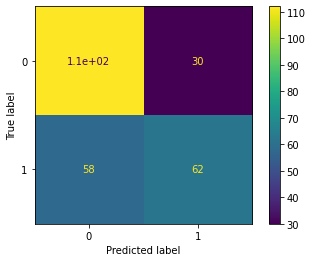

In [57]:
#Confusion Matrix and Classification Report for Test Data
print('Confusion Matrix:-\n',confusion_matrix(Ytest, ytest_predict))
plot_confusion_matrix(bestmodel,Xtest,Ytest);
print('\nClassification Report:-\n',classification_report(Ytest, ytest_predict))

AUC: 0.729


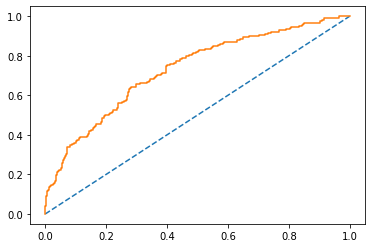

In [58]:
#AUC and ROC for train data
probs = bestmodel.predict_proba(Xtrain)
probs = probs[:, 1]
lr_train_auc = roc_auc_score(Ytrain, probs)
print('AUC: %.3f' % lr_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(Ytrain, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC: 0.715


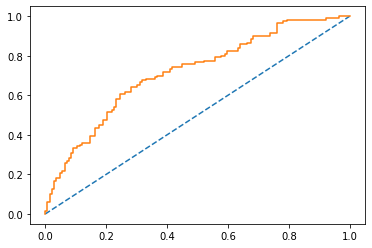

In [59]:
#AUC and ROC for test data
probs = bestmodel.predict_proba(Xtest)
probs = probs[:, 1]
lr_test_auc = roc_auc_score(Ytest, probs)
print('AUC: %.3f' % lr_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(Ytest, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [60]:
lr_metrics=classification_report(Ytrain, ytrain_predict,output_dict=True)
data1=pd.DataFrame(lr_metrics).transpose()
lr_train_f1score=round(data1.loc["1"][2],2)
lr_train_recall=round(data1.loc["1"][1],2)
lr_train_precision=round(data1.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1score)

lr_metrics=classification_report(Ytest, ytest_predict,output_dict=True)
data1=pd.DataFrame(lr_metrics).transpose()
lr_test_f1score=round(data1.loc["1"][2],2)
lr_test_recall=round(data1.loc["1"][1],2)
lr_test_precision=round(data1.loc["1"][0],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1score)

lr_train_precision  0.66
lr_train_recall  0.54
lr_train_f1  0.59
lr_test_precision  0.67
lr_test_recall  0.52
lr_test_f1  0.58


### LDA

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [62]:
lda = LinearDiscriminantAnalysis()
ldamodel=lda.fit(Xtrain,Ytrain)

In [63]:
train_pred = ldamodel.predict(Xtrain)
test_pred = ldamodel.predict(Xtest)

print('Train Set Accuracy:-',ldamodel.score(Xtrain, Ytrain))
print('Test Set Accuracy:-',ldamodel.score(Xtest, Ytest))
print('\nConfusion Matrix for Train Set:-\n',confusion_matrix(Ytrain, train_pred))
print('\nClassification Report for Train Set:-\n',classification_report(Ytrain, train_pred))
print('\nConfusion Matrix for Test Set:-\n',confusion_matrix(Ytest, test_pred))
print('\nClassification Report for Test Set:-\n',classification_report(Ytest, test_pred))

Train Set Accuracy:- 0.6622950819672131
Test Set Accuracy:- 0.648854961832061

Confusion Matrix for Train Set:-
 [[243  86]
 [120 161]]

Classification Report for Train Set:-
               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610


Confusion Matrix for Test Set:-
 [[108  34]
 [ 58  62]]

Classification Report for Test Set:-
               precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262



Confusion Matrix for Train Data


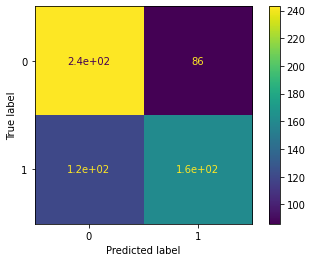

In [64]:
print("Confusion Matrix for Train Data")
plot_confusion_matrix(ldamodel,Xtrain,Ytrain);

Confusion Matrix for Test Data


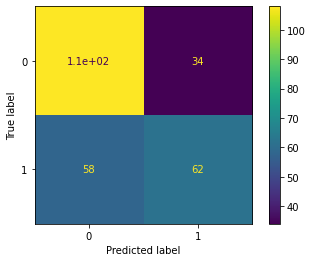

In [65]:
print("Confusion Matrix for Test Data")
plot_confusion_matrix(ldamodel,Xtest,Ytest);

AUC: 0.731


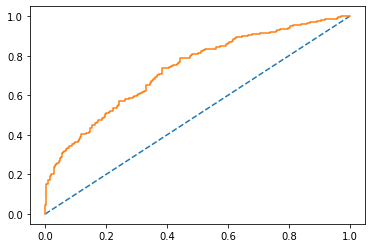

In [66]:
#AUC and ROC for train data
probs = ldamodel.predict_proba(Xtrain)
probs = probs[:, 1]
lda_train_auc = roc_auc_score(Ytrain, probs)
print('AUC: %.3f' % lda_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(Ytrain, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC: 0.714


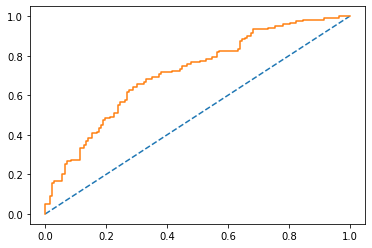

In [67]:
#AUC and ROC for test data
probs = ldamodel.predict_proba(Xtest)
probs = probs[:, 1]
lda_test_auc = roc_auc_score(Ytest, probs)
print('AUC: %.3f' % lda_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(Ytest, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [68]:
probs_train = ldamodel.predict_proba(Xtrain)
probs_train = probs_train[:, 1]

for j in np.arange(0.1,1,0.1):
    custom_prob = j 
    custom_cutoff_data=[]
    for i in range(0,len(Ytrain)):
        if np.array(probs_train)[i] > custom_prob:
            a=1
        else:
            a=0
        custom_cutoff_data.append(a)
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Ytrain,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(Ytrain,custom_cutoff_data),4),'\n')

0.1 

Accuracy Score 0.4738
F1 Score 0.6356 

0.2 

Accuracy Score 0.523
F1 Score 0.6498 

0.3 

Accuracy Score 0.6066
F1 Score 0.6774 

0.4 

Accuracy Score 0.6623
F1 Score 0.6677 

0.5 

Accuracy Score 0.6623
F1 Score 0.6098 

0.6 

Accuracy Score 0.6508
F1 Score 0.5192 

0.7 

Accuracy Score 0.6426
F1 Score 0.4263 

0.8 

Accuracy Score 0.5902
F1 Score 0.2038 

0.9 

Accuracy Score 0.5426
F1 Score 0.0141 



In [69]:
lda_metrics=classification_report(Ytrain, train_pred,output_dict=True)
data2=pd.DataFrame(lda_metrics).transpose()
lda_train_f1score=round(data2.loc["1"][2],2)
lda_train_recall=round(data2.loc["1"][1],2)
lda_train_precision=round(data2.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lr_train_f1score)

lda_metrics=classification_report(Ytest, test_pred,output_dict=True)
data2=pd.DataFrame(lda_metrics).transpose()
lda_test_f1score=round(data2.loc["1"][2],2)
lda_test_recall=round(data2.loc["1"][1],2)
lda_test_precision=round(data2.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1score)

lda_train_precision  0.65
lda_train_recall  0.57
lda_train_f1  0.59
lda_test_precision  0.65
lda_test_recall  0.52
lda_test_f1  0.57


In [70]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[bestmodel.score(Xtrain, Ytrain),lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1score],
        'LR Test':[bestmodel.score(Xtest, Ytest),lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1score],
       'LDA Train':[ldamodel.score(Xtrain, Ytrain),lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1score],
        'LDA Test':[ldamodel.score(Xtrain, Ytrain),lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1score],},index=index)
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.66,0.66,0.66,0.66
AUC,0.73,0.72,0.73,0.71
Recall,0.54,0.52,0.57,0.52
Precision,0.66,0.67,0.65,0.65
F1 Score,0.59,0.58,0.61,0.57
